Data availability:
    centrum : from 2019-02-07 continuous
    com: 2018-11-04 2019-04-30 and 219-10-21 continuous
    hu: continuous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime

In [2]:
db = pd.read_csv('VkerDB.csv')
db.shape

(2716, 11)

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 11 columns):
id             2716 non-null int64
date           2716 non-null object
price          2716 non-null float64
price_sqm      2716 non-null int64
room           2716 non-null float64
sqm            2716 non-null float64
region         1780 non-null object
description    1117 non-null object
agency         900 non-null object
source         2716 non-null object
url            2716 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 233.5+ KB


In [4]:
db['date'] = pd.to_datetime(db['date'])
db['date'] = db['date'].map(lambda x: x.date())
db.dtypes

id               int64
date            object
price          float64
price_sqm        int64
room           float64
sqm            float64
region          object
description     object
agency          object
source          object
url             object
dtype: object

In [62]:
db.sort_values('date', inplace = True)
db.reset_index(drop = True, inplace = True)

In [63]:
# the last date processed
for i in db['source'].unique():
    last =db.loc[(db['source'] == i), 'date'].max()
    print('Last prcessed date for {}: {}'.format(i,last) )

Last prcessed date for com: 2019-11-13
Last prcessed date for hu: 2019-11-13
Last prcessed date for centrum: 2019-11-13


#### number of ads by sources
only hu is complete

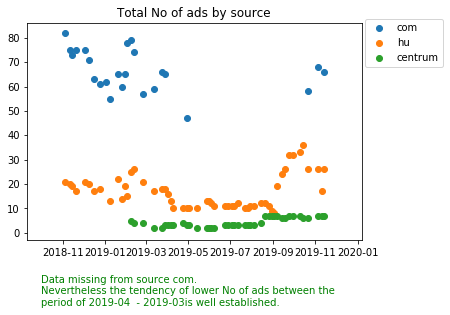

In [26]:
fig = plt.figure()

for i in db['source'].unique():
    v = db.loc[db['source'] == i].groupby('date')['id'].count()
    plt.scatter(v.index, v, label = i)
    
plt.title('Total No of ads by source')
plt.legend(loc = (1.01,0.8))
plt.text('2018-10', -30, 'Data missing from source com.\nNevertheless \
the tendency of lower No of ads between the\nperiod of 2019-04  - 2019-03\
 is well established.', color = 'g')
plt.show()

#### number of newly published ads by source

In [27]:
# No of ads on their first appearience, monthly new ads
idcount = db.groupby('id').agg({'date': 'min'}).groupby('date').agg({'date':'count'})
idcount['new_ids'] =idcount['date']
idcount = idcount.drop('date', axis = 1)
idcount['total'] = db.groupby('date').agg({'date':'count'})
idcount['ratio%'] = round((idcount['new_ids'] * 100) / idcount['total'], 1)

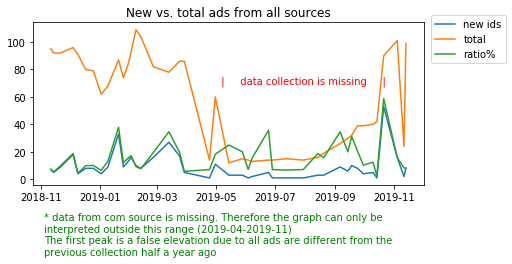

In [28]:
fig = plt.figure(figsize = (7,3))
plt.plot(idcount['new_ids'][1:], label = 'new ids')
plt.plot(idcount['total'][1:], label = 'total')    
plt.plot(idcount['ratio%'][1:], label = 'ratio%')
plt.legend(loc = (1.02,0.75))
plt.annotate('  |     data collection is missing     |', xy=(idcount.index[21], 70), color = 'r')
plt.text(idcount.index[0],-55, '* data from com source is missing. Therefore \
the graph can only be \ninterpreted outside this range (2019-04-2019-11) \n\
The first peak is a false elevation due to all ads are different from the \n\
previous collection half a year ago', color='g')
plt.title('New vs. total ads from all sources');

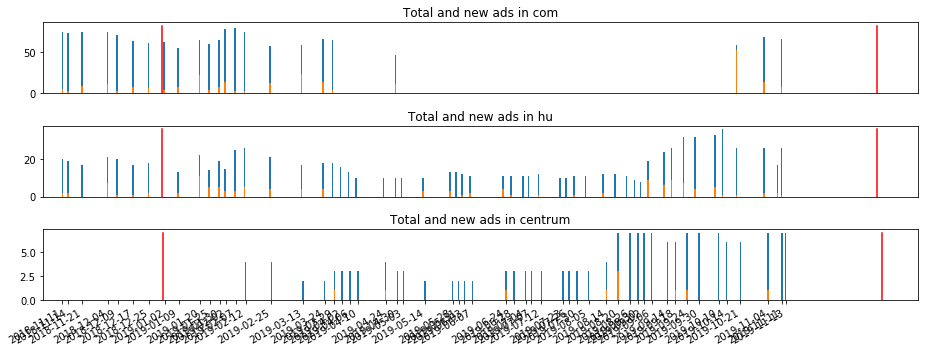

In [149]:
fig = plt.figure(figsize = (13,5))
a = 1 #subplot starter
#plt.title('No of new ads by source')
x = db.groupby('date')['date'].count().index
for i in db['source'].unique():
    ax = fig.add_subplot(3,1, a)
    v = db.loc[db['source'] == i].groupby('id').agg({'date': 'min'}).groupby('date').agg({'date':'count'})
    v['ids'] = v['date']
    vv = db.loc[db['source'] == i].groupby('date')['date'].count()
    ax.bar(vv.index[1:], vv[1:], label = 'total ' + i)
    ax.bar(v.index[1:], v['ids'][1:], label = 'new ' + i)
    ax.plot([pd.to_datetime('2019-1-1').date(),pd.to_datetime('2019-1-1').date()],[0, vv.max()], c='r')
    ax.plot([pd.to_datetime('2020-1-1').date(),pd.to_datetime('2020-1-1').date()],[0, vv.max()], c='r')
    ax.set_title('Total and new ads in {}'.format(i))
    #plt.legend(loc = (1.01,0.7))
    #ax.set_xticks(x[1:])
    ax.set_xticks([])
    ax.set_xlim(pd.to_datetime('2018-11-1').date())
    
    a +=1
    
plt.xticks(x[1:], rotation = 30, ha = 'right')
plt.tight_layout()
plt.show()

In [10]:
# unique ads features
unique = db.groupby('id').agg({'id': 'count','price': 'mean', 'price_sqm': 'mean', 'sqm': 'mean','date': 'min'})

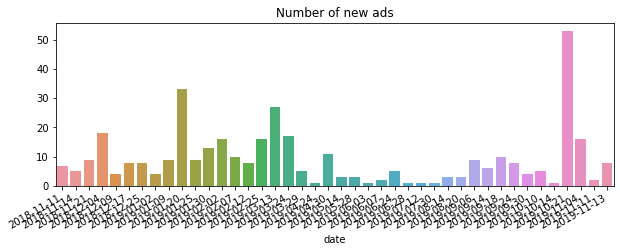

In [40]:
fig = plt.figure(figsize=(10,3))
news = unique.groupby('date')['price'].count()[1:]
sns.barplot(news.index,news.values)
plt.xticks(rotation=30, ha = 'right' )
plt.title('Number of new ads')
plt.show()

#### price change tendencies
all data included

In [49]:
itemcounts = db.groupby('date').agg({'id': 'count', 
                       'sqm': 'mean', 
                       'price': ['mean','median','min','max']})

'\nthe number of ads plummeted between April 2019 - September 2019\nSince September the numbere of ads hit up\n'

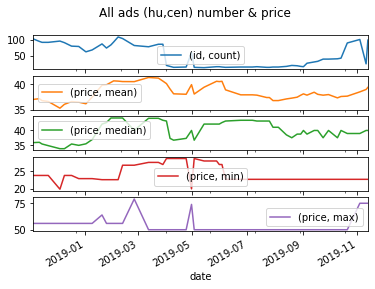

In [50]:
itemcounts[['id', 'price']].plot(subplots=True, sharex = True, \
                                 title = 'All ads (hu,cen) number & price')
;
'''
the number of ads plummeted between April 2019 - September 2019
Since September the numbere of ads hit up
'''

In [51]:
# get rid of outlayers
itemcounts['Q75'] = db.groupby('date')['price'].quantile(0.75)
itemcounts['Q25'] = db.groupby('date')['price'].quantile(0.25)
itemcounts['Q90'] = db.groupby('date')['price'].quantile(0.90)
itemcounts['Q10'] = db.groupby('date')['price'].quantile(0.10)

In [54]:
32500000/30

1083333.3333333333

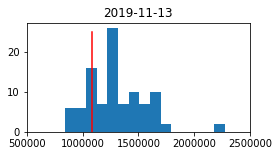

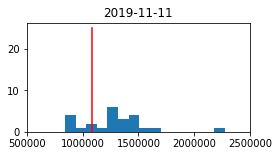

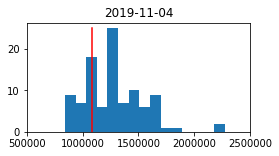

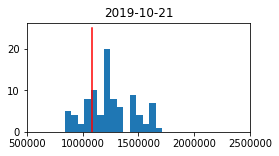

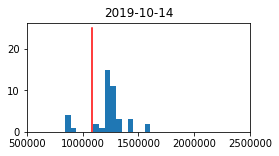

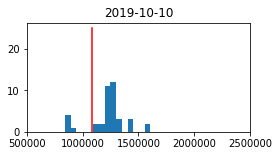

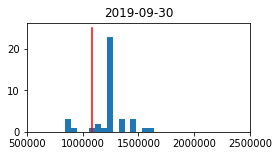

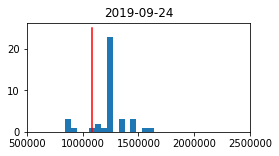

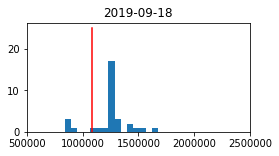

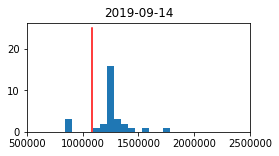

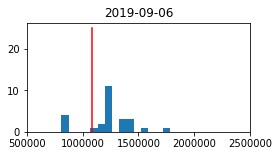

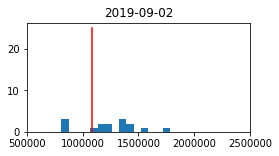

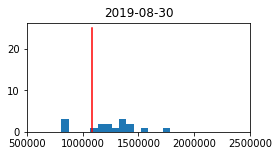

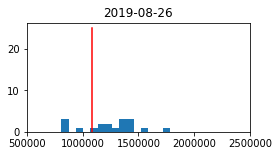

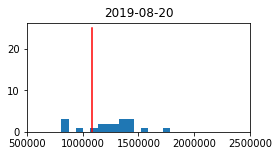

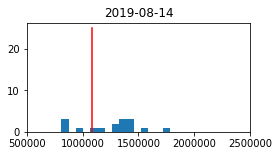

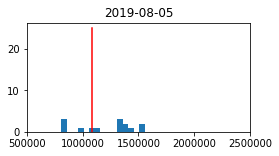

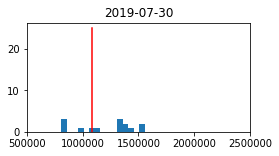

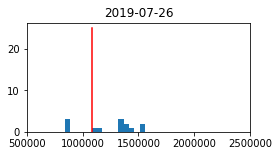

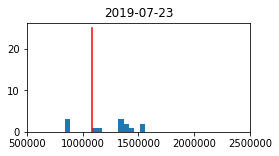

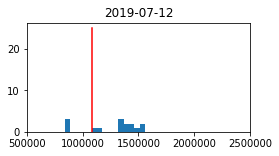

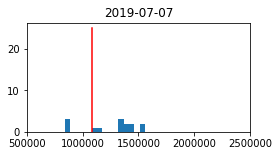

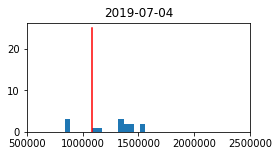

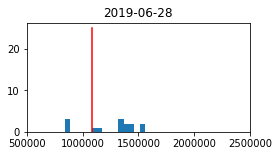

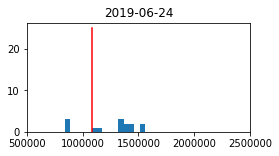

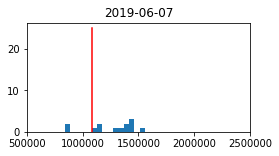

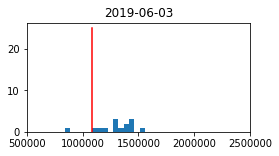

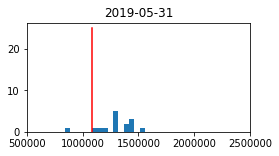

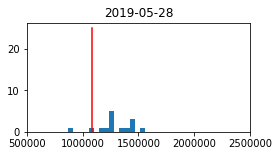

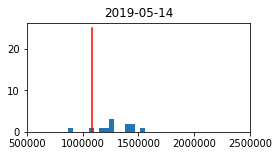

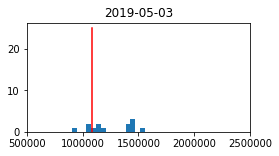

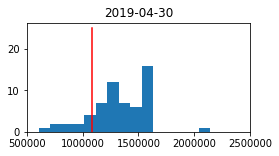

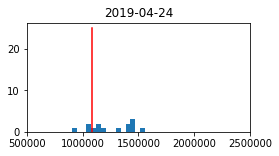

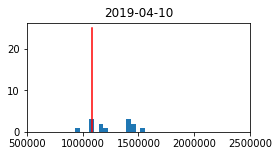

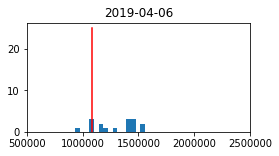

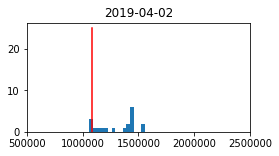

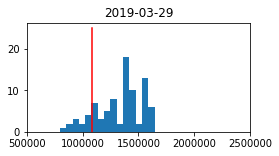

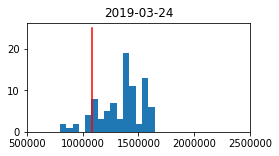

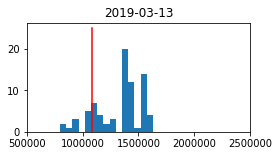

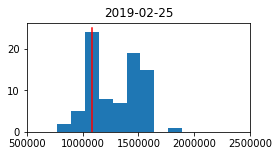

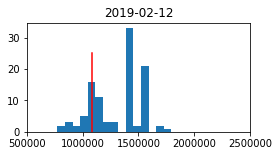

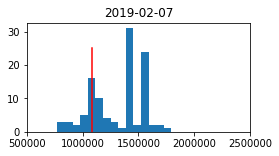

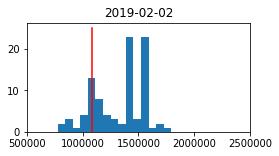

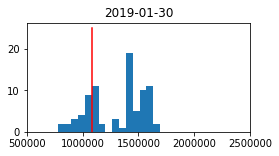

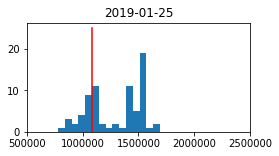

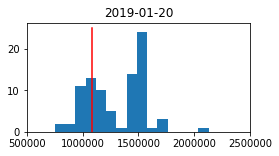

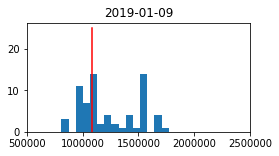

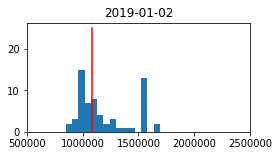

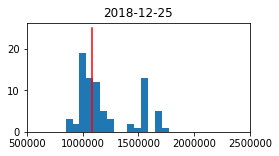

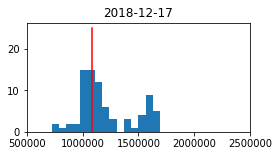

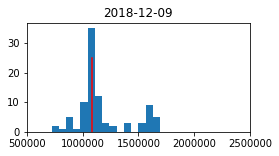

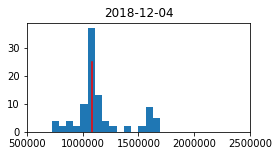

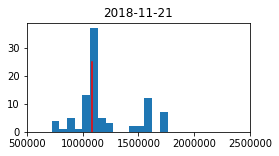

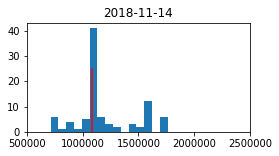

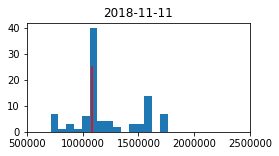

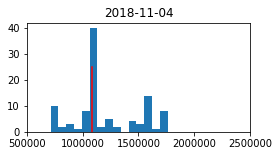

In [36]:
# see price per sqm distribution by dates
for i in sorted(db['date'].unique(), reverse = True):    
    v = db[db['date'] == i].groupby('id')['price_sqm'].mean()
    fig = plt.figure(figsize=(4,2))    
    plt.hist(v, bins = 15)
    plt.plot([1083000,1083000],[0,25], c ='r')
    plt.xlim(500000,2500000)
    plt.title(i)
    plt.show()

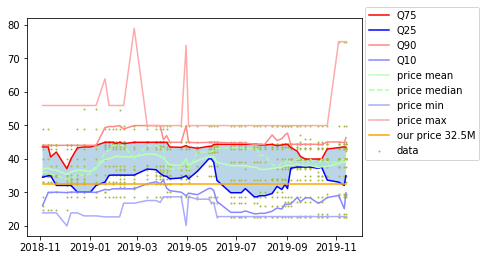

In [56]:
fig = plt.figure(figsize=(6,4))
plt.plot(itemcounts[['Q75']],c='r', label ='Q75')
plt.plot(itemcounts[['Q25']], c ='b', label = 'Q25')
plt.plot(itemcounts[['Q90']],c='#ff8888', label ='Q90')
plt.plot(itemcounts[['Q10']], c ='#8888ff', label = 'Q10')
plt.plot(itemcounts[('price','mean')],c='#bbffbb', label = 'price mean')
plt.plot(itemcounts[('price', 'median')],c='#aaffaa',  linestyle='--', label = 'price median')
plt.plot(itemcounts[('price','min')], c= '#aaaaff', label = 'price min')
plt.plot(itemcounts[('price','max')], c='#ffaaaa', label = 'price max')
plt.fill_between(itemcounts.index,itemcounts['Q25'],itemcounts['Q75'], alpha = 0.3)
plt.plot(itemcounts.index, np.repeat(32.5, len(itemcounts)),c='orange', label='our price 32.5M')
plt.scatter(db.loc[(db['source'] != 'com'),'date'], db.loc[db['source'] != 'com','price'],s = 1, c='#aabb44', label= 'data' )
plt.legend(loc = (1.01,0.35))
plt.show()

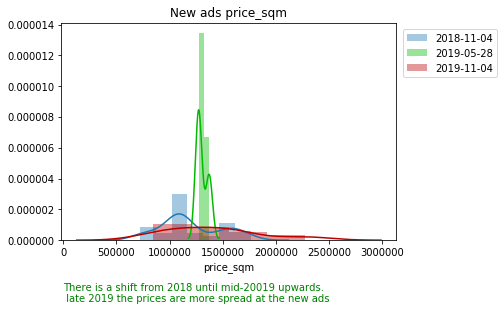

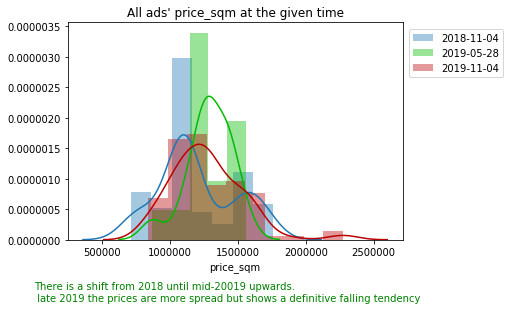

In [11]:
# compare 3 timepoints price_sqm
import seaborn as sns
g = unique.loc[unique['date'] == datetime.date(2018, 11, 4)]
gg = unique.loc[unique['date'] == datetime.date(2019, 5, 28)]
ggg = unique.loc[unique['date'] == datetime.date(2019, 11, 4)]
sns.distplot(g['price_sqm'], label = '2018-11-04')
sns.distplot(gg['price_sqm'], color='#00bb00', label = '2019-05-28')
sns.distplot(ggg['price_sqm'],color = '#bb0000', label = '2019-11-04')
plt.legend(loc=(1.02,0.75))
plt.text(0.000,-0.000004, 'There is a shift from 2018 until mid-20019 upwards.\n \
late 2019 the prices are more spread at the new ads ', fontdict ={'color':'green'})
plt.title('New ads price_sqm')
plt.show()

e = db.loc[db['date'] == datetime.date(2018, 11, 4)]
ee = db.loc[db['date'] == datetime.date(2019, 5, 28)]
eee = db.loc[db['date'] == datetime.date(2019, 11, 4)]

sns.distplot(e['price_sqm'], label = '2018-11-04')
sns.distplot(ee['price_sqm'],color='#00bb00', label = '2019-05-28')
sns.distplot(eee['price_sqm'], color = '#bb0000', label = '2019-11-04')
plt.legend(loc=(1.02,0.75))
plt.text(0.000,-0.000001, 'There is a shift from 2018 until mid-20019 upwards.\n \
late 2019 the prices are more spread but shows a definitive falling tendency ', fontdict ={'color':'green'})
plt.title('All ads\' price_sqm at the given time')
plt.show()


In [57]:
# ads lifetime: com excluded, 156 individual ads over a year
db1= db.loc[(db['source'] != 'com')].groupby('id').agg({'date': ['count', 'min','max'], 'price': 'mean', 'price_sqm': 'mean'}).sort_values([('date','max'),('date','count')])
#exclude the one still active: 124
maxdates = db1[('date','max')].unique()
inact = db1.loc[db1[('date','max')] != maxdates[-1]]
act = db1.loc[db1[('date','max')] == maxdates[-1]]

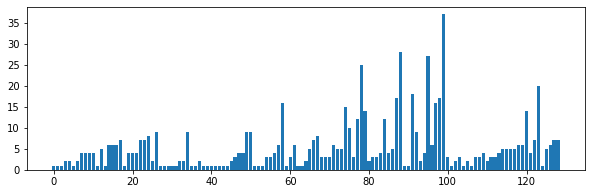

In [58]:
fig = plt.figure(figsize=(10,3))
plt.bar(range(len(inact.index)), inact[('date','count')].values)
plt.show()
#inact[['price', 'price_sqm',]].hist(figsize=(10,2),sharex =True, bins=15)
#act[['price', 'price_sqm',]].hist(figsize=(10,3), sharex = True, bins=15);
# previous one year vs latest 

In [86]:
db.columns

Index(['id', 'date', 'price', 'price_sqm', 'room', 'sqm', 'region',
       'description', 'agency', 'source', 'url'],
      dtype='object')

In [13]:
#lenght of advertisment time
onair = db.groupby('id').agg({'date': ['min', 'max']})
onair[('date', 'delta')] = onair[('date','max')] - onair[('date','min')]

In [14]:
onair.sort_values([('date','min'),('date','delta')], inplace =True)

In [125]:
#converting timedelta to int + 1 to avoid  0 days
onair['days'] = onair[('date','delta')].map(lambda x: ((np.timedelta64(x, 'h')) / 24).astype('int')+1)          

In [127]:
onair_count = onair.groupby([('date','min'), 'days']).count()

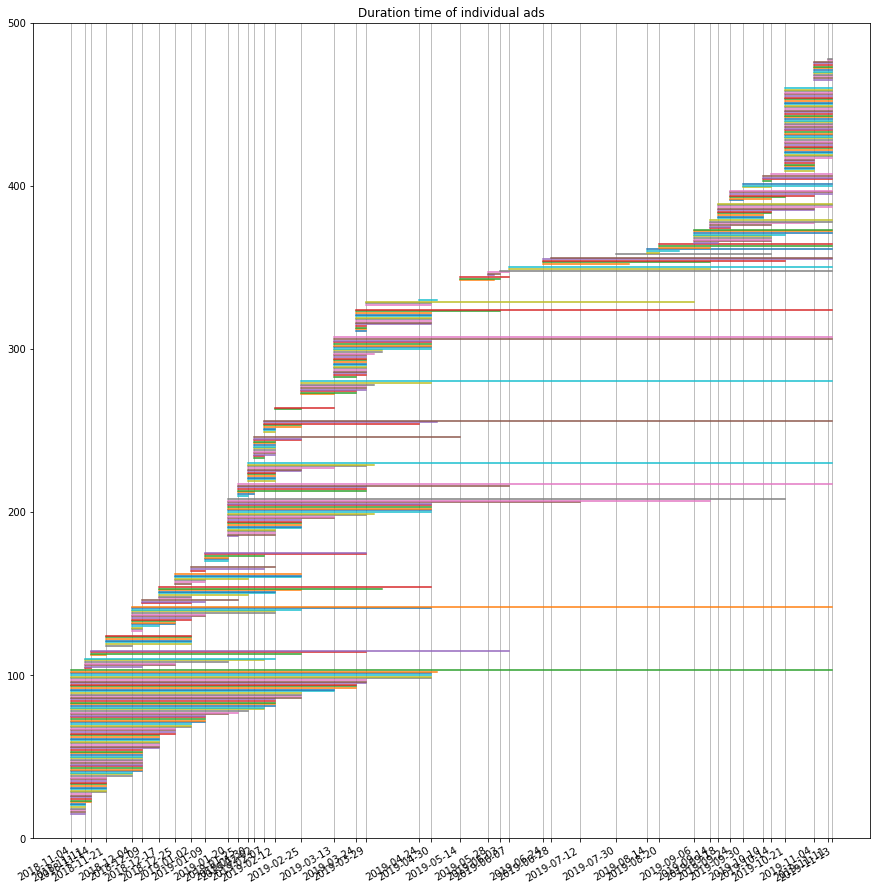

In [161]:
h = 1
fig = plt.figure(figsize = (15,15))
for i in onair.iterrows():
    plt.plot((i[1][0],i[1][1]),(h,h))
    h += 1
    
plt.title('Duration time of individual ads')
plt.ylim(0,500)
plt.xticks(onair[('date','min')].unique(), rotation = 30, ha= 'right')
plt.grid(axis='x')
plt.show()

/home/trismegistos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


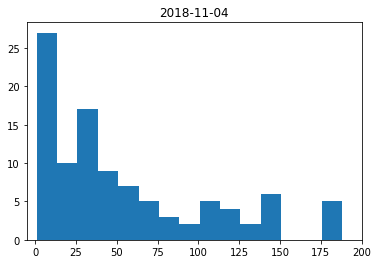

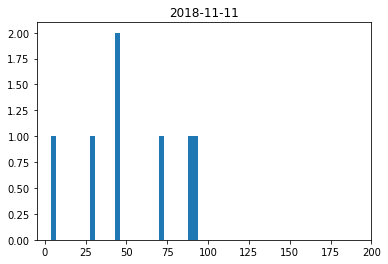

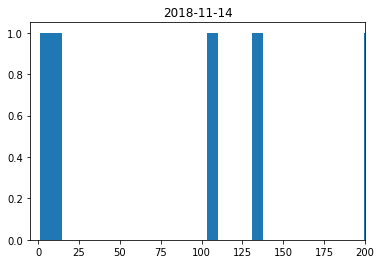

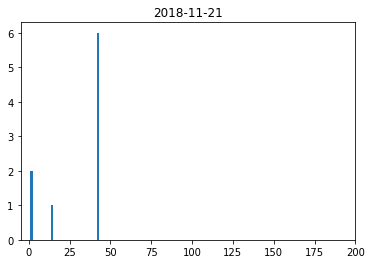

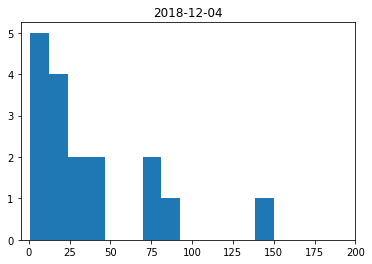

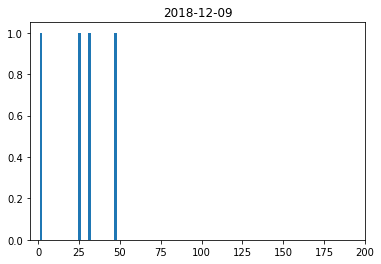

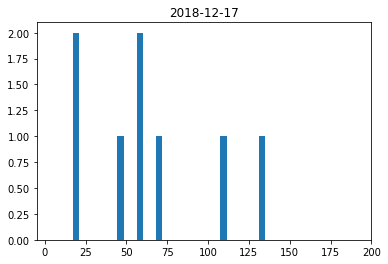

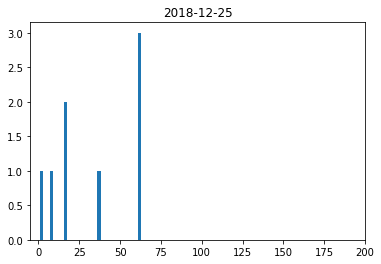

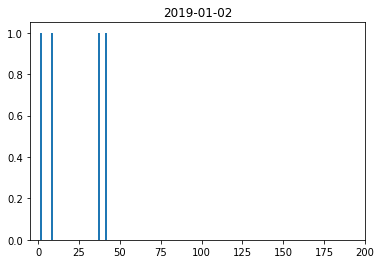

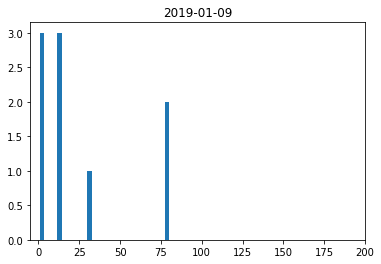

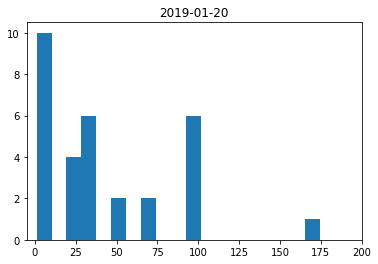

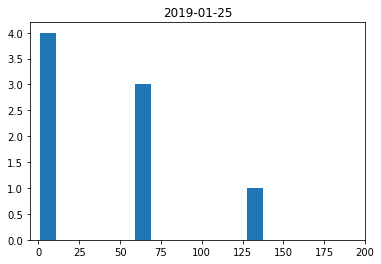

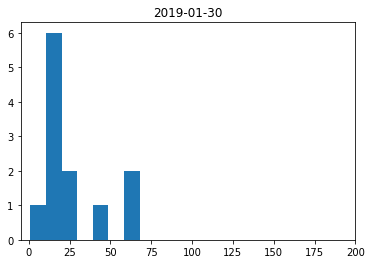

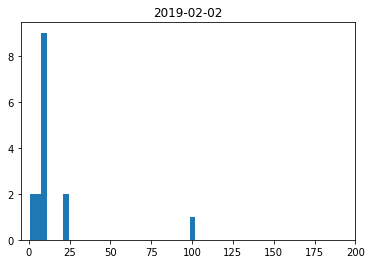

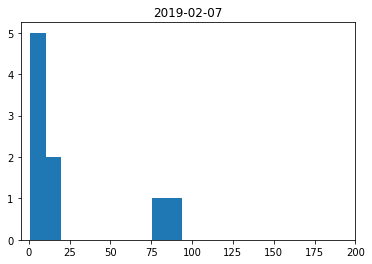

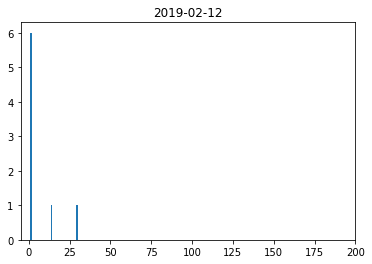

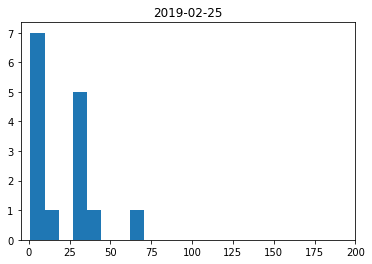

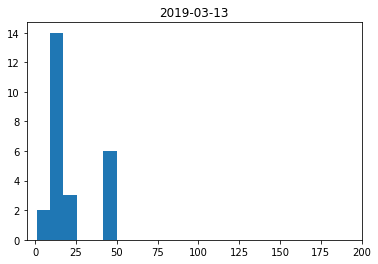

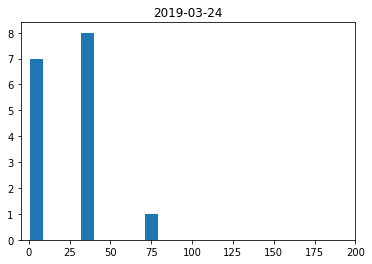

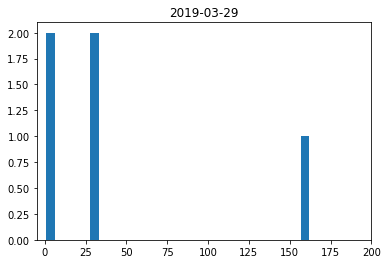

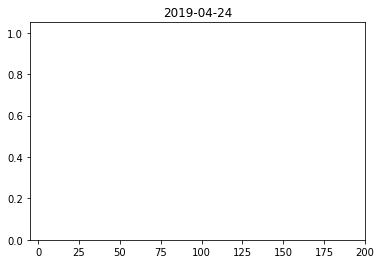

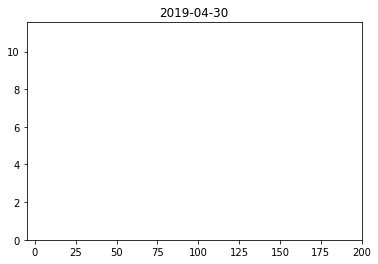

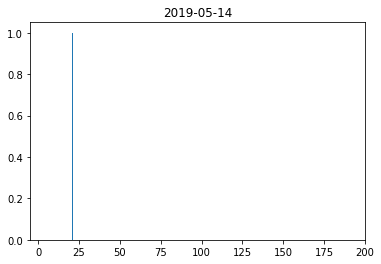

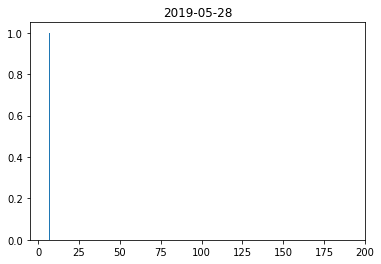

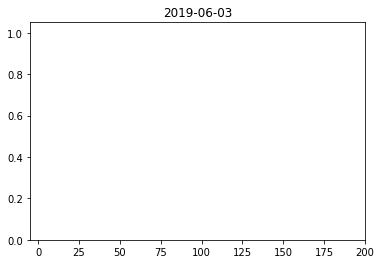

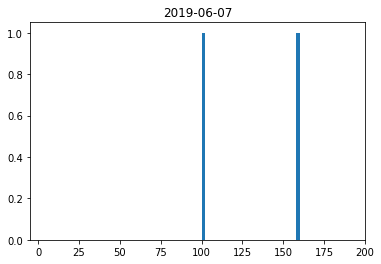

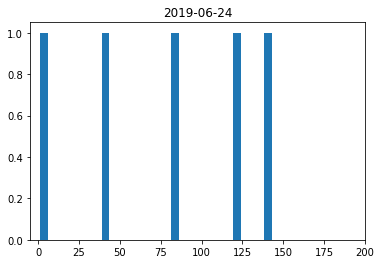

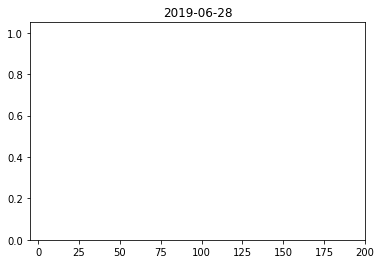

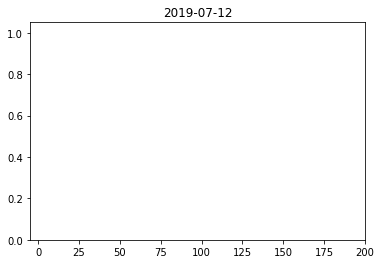

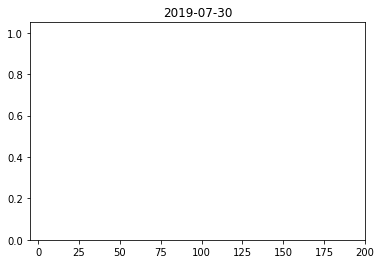

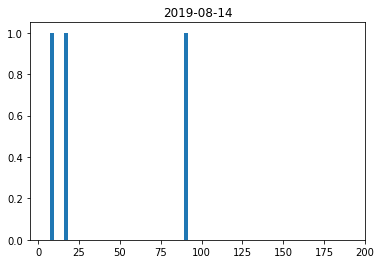

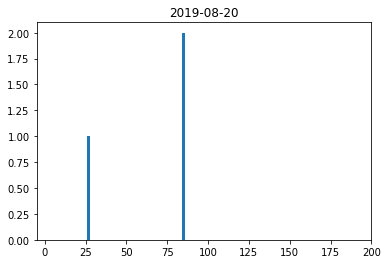

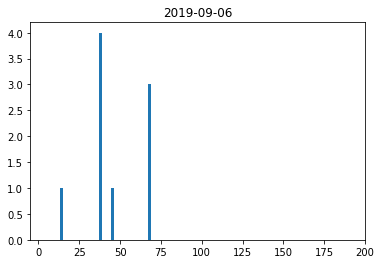

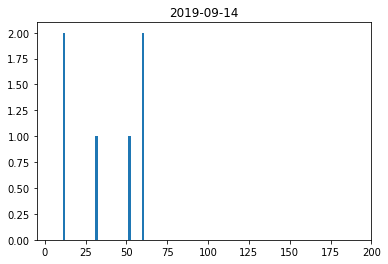

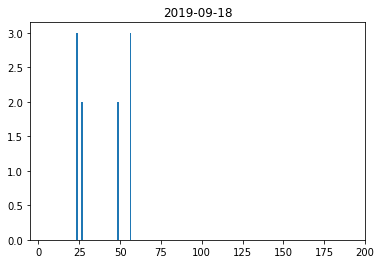

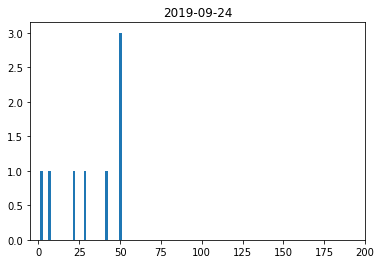

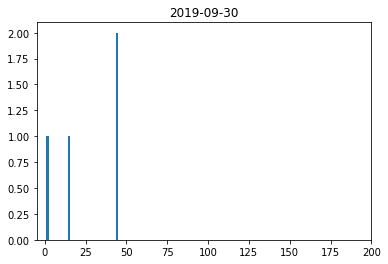

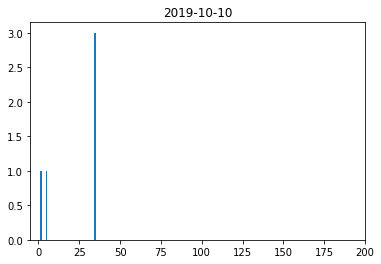

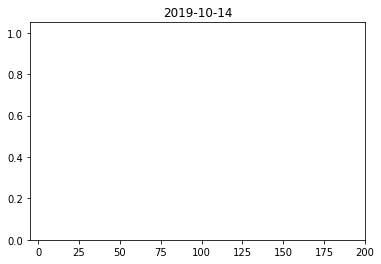

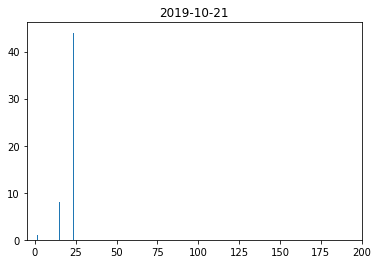

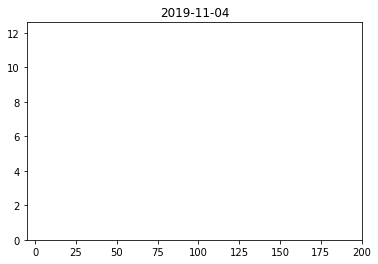

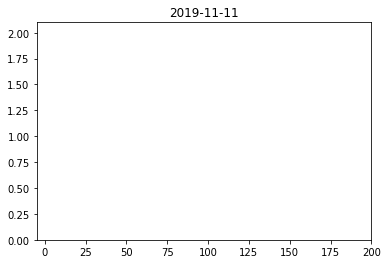

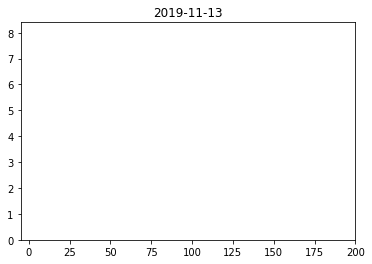

In [159]:
for i in onair[('date','min')].unique():
    d = onair.loc[onair[('date','min')] == i, 'days' ]
    fig = plt.figure()
    plt.hist(d, bins = 30)
    plt.title(i)
    plt.xlim(-5,200)
plt.show()